In [25]:
# 1. import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [26]:
# Building Dataset for the GNOD PROJECT

In [27]:
#  url of the site
url = "https://www.billboard.com/charts/hot-100"

In [28]:
# download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [29]:
# parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
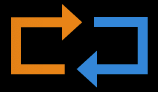

In [30]:
print(soup.prettify())

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
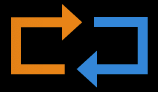

In [31]:
soup

In [34]:
# Selector

soup.select("div.o-chart-results-list-row-container > ul > li.lrv-u-width-100p")


[<li class="lrv-u-width-100p">
 <ul class="lrv-a-unstyle-list lrv-u-flex lrv-u-height-100p lrv-u-flex-direction-column@mobile-max">
 <li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-1@mobile-max">
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Anti-Hero		
 	
 </h3>
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Taylor Swift
 </span>
 </li>
 <li class="o-chart-results-l

In [33]:
songs = soup.select('div.o-chart-results-list-row-container > ul > li.lrv-u-width-100p')
len(songs)

100

In [121]:
titles = []
artists = []
for row in songs: 
    titles.append(row.h3.get_text().strip())
    artists.append(row.span.get_text().strip())
print(titles, artists)

['Anti-Hero', 'Unholy', 'Kill Bill', "I'm Good (Blue)", 'Rich Flex', "Creepin'", 'As It Was', 'Die For You', 'Bad Habit', 'Cuff It', 'Something In The Orange', 'Made You Look', 'You Proof', 'Under The Influence', 'Golden Hour', 'Just Wanna Rock', 'Thank God', 'Super Freaky Girl', 'I Like You (A Happier Song)', 'Rock And A Hard Place', 'Tomorrow 2', 'Wasted On You', 'Shirt', 'Superhero (Heroes & Villains)', 'Lift Me Up', 'About Damn Time', 'Until I Found You', 'Wait For U', 'Sunroof', "I Ain't Worried", 'Going, Going, Gone', 'Vegas', 'Thought You Should Know', 'The Kind Of Love We Make', 'She Had Me At Heads Carolina', 'Son Of A Sinner', 'Lavender Haze', 'Wait In The Truck', 'Heart Like A Truck', "Victoria's Secret", 'Unstoppable', 'Nobody Gets Me', 'Escapism', 'What My World Spins Around', 'Low', 'Calm Down', 'Whiskey On You', 'Fall In Love', 'Jimmy Cooks', 'Bebe Dame', 'Blind', 'Hold Me Closer', 'Snooze', "Star Walkin' (League Of Legends Worlds Anthem)", 'Hotel Lobby (Unc And Phew)', 

In [123]:
top100billboard = pd.DataFrame({'titles':titles, 'Artists':artists})

In [124]:
top100billboard.head(100)

titles                    Artists
0                 Anti-Hero               Taylor Swift
1                    Unholy     Sam Smith & Kim Petras
2                 Kill Bill                        SZA
3           I'm Good (Blue)  David Guetta & Bebe Rexha
4                 Rich Flex          Drake & 21 Savage
..                      ...                        ...
95  Shut Up My Moms Calling                 Hotel Ugly
96            Midnight Rain               Taylor Swift
97                  Players                  Coi Leray
98       Major Distribution          Drake & 21 Savage
99                Notice Me                        SZA

[100 rows x 2 columns]

In [126]:
top100billboard.to_excel('top100billboard.xlsx', index=False)

In [127]:
top100billboard.to_csv('top100billboard.csv', index=False)

In [39]:
from time import sleep

In [25]:
for i in range(5):
    print(i)
    sleep(.5)

0
1
2
3
4


In [27]:
from random import randint

In [9]:
for i in range(5):
    print(i)
    wait_time = randint(1,4000)
    print("I will sleep for " + str(wait_time/1000) + " seconds.")
    sleep(wait_time/1000)

0
I will sleep for 3.246 seconds.
1
I will sleep for 1.963 seconds.
2
I will sleep for 0.762 seconds.
3
I will sleep for 3.27 seconds.
4
I will sleep for 1.679 seconds.


In [10]:
iterations = range(1, 610, 50)
[i for i in iterations]

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601]

In [11]:
iterations = range(1, 200, 50)
[i for i in iterations]

[1, 51, 101, 151]

In [91]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

#PROJECT EXPANSION


In [95]:
#PROJECT EXPANSION

#mw-content-text > div.mw-parser-output > table.wikitable.sortable.mw-collapsible.jquery-tablesorter.mw-made-collapsible > tbody > tr:nth-child(1)
#mw-content-text > div.mw-parser-output > table.wikitable.sortable.mw-collapsible.jquery-tablesorter.mw-made-collapsible > tbody#

# 2. url: we start with the 'second' page. Show that you can start whenever you want
url = "https://en.wikipedia.org/wiki/List_of_songs_recorded_by_Maroon_5"


In [96]:
#  url of the site
url = "https://en.wikipedia.org/wiki/List_of_songs_recorded_by_Maroon_5"

In [97]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [98]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [99]:
# 4.2. check that the html code looks like it should
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of songs recorded by Maroon 5 - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"04527a02-f569-4efe-a2a5-37cf823a32b6","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_songs_recorded_by_Maroon_5","wgTitle":"List of songs recorded by Maroon 5","wgCurRevisionId":1125029642,"wgRevisionId":1125029642,"wgArticleId":38405772,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Article

In [105]:
# Selector


In [114]:
#Practice web scraping

#As you've seen, scraping the internet is a skill that can get you all sorts of information. Here are some little challenges that you can try to gain more experience in the field:

#Retrieve an arbitrary Wikipedia page of "Python" and create a list of links on that page: url ='https://en.wikipedia.org/wiki/Python'
#Find the number of titles that have changed in the United States Code since its last release point: url = 'http://uscode.house.gov/download/download.shtml'
#Create a Python list with the top ten FBI's Most Wanted names: url = 'https://www.fbi.gov/wanted/topten'
#Display the 20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe: url = 'https://www.emsc-csem.org/Earthquake/'
#List all language names and number of related articles in the order they appear in wikipedia.org: url = 'https://www.wikipedia.org/'
#A list with the different kind of datasets available in data.gov.uk: url = 'https://data.gov.uk/'
#Display the top 10 languages by number of native speakers stored in a pandas dataframe: url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'



#Retrieve an arbitrary Wikipedia page of "Python" 
#and create a list of links on that page: url ='https://en.wikipedia.org/wiki/Python'


#1.URL
url = "https://en.wikipedia.org/wiki/Python"

#main-content > div > div:nth-child(1) > div > div > div > h1

In [115]:
# 2. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [116]:
# 3. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [124]:
# 4. check that the html code looks like it should
#soup.select('#mw-content-text > div.mw-parser-output > ul:nth-child(9) > li:nth-child(1)')

In [125]:
#soup.select("li.mw-headline Snakes") # all the info about all the movies

In [137]:
#list of all the links
links = soup.find_all("a")
print(links)
print("\n")


[<a id="top"></a>, <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>, <a class="mw-jump-link" href="#searchInput">Jump to search</a>, <a class="extiw" href="https://en.wiktionary.org/wiki/Python" title="wiktionary:Python">Python</a>, <a class="extiw" href="https://en.wiktionary.org/wiki/python" title="wiktionary:python">python</a>, <a href="#Snakes"><span class="tocnumber">1</span> <span class="toctext">Snakes</span></a>, <a href="#Computing"><span class="tocnumber">2</span> <span class="toctext">Computing</span></a>, <a href="#People"><span class="tocnumber">3</span> <span class="toctext">People</span></a>, <a href="#Roller_coasters"><span class="tocnumber">4</span> <span class="toctext">Roller coasters</span></a>, <a href="#Vehicles"><span class="tocnumber">5</span> <span class="toctext">Vehicles</span></a>, <a href="#Weaponry"><span class="tocnumber">6</span> <span class="toctext">Weaponry</span></a>, <a href="#Other_uses"><span class="tocnumber">7</span> <span class="t

In [138]:
for link in links:
    if "python" in link.text:
        print(link)
        print(link.attrs['href'])

<a class="extiw" href="https://en.wiktionary.org/wiki/python" title="wiktionary:python">python</a>
https://en.wiktionary.org/wiki/python


In [151]:
#l = []
#for h in soup.find_all('h2'):
   # a = h.find('a')
    #try:
      #  if 'href' in a.attrs:
            l = a.get('href')
    #except:
      #  pass
    
    
#print (l)
    

/w/index.php?title=Python&action=edit&section=8


In [155]:
urls=[]

for h2_tag in soup.find_all("h2"):
    a_tag = h2_tag.find('a')
    urls.append(a_tag.attrs['href'])
    
print (urls)

AttributeError: 'NoneType' object has no attribute 'attrs'

In [38]:
# 1. import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

#\35 0-too-much-love-lcd-soundsystem-2006-


#  url of the site
url = "https://en.wikipedia.org/wiki/List_of_songs_recorded_by_Dido "


In [39]:
# download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [40]:
# parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [41]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of songs recorded by Dido - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f22e2fab-aa90-4f73-a5df-d3f726ce7a45","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_songs_recorded_by_Dido","wgTitle":"List of songs recorded by Dido","wgCurRevisionId":1122384082,"wgRevisionId":1122384082,"wgArticleId":39292972,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages containing links to subscription-only content","CS1 maint: others in cite AV 

In [42]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of songs recorded by Dido - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f22e2fab-aa90-4f73-a5df-d3f726ce7a45","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_songs_recorded_by_Dido","wgTitle":"List of songs recorded by Dido","wgCurRevisionId":1122384082,"wgRevisionId":1122384082,"wgArticleId":39292972,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages containing links to subscription-only content","CS1 maint: others in cite AV media (notes)","A

In [48]:
# Selector

soup.select("#mw-content-text > div.mw-parser-output > table.wikitable.sortable.plainrowheaders.jquery-tablesorter > tbody > tr:nth-child(1) > td:nth-child(2) > span > a")


[]

In [50]:
Didotab = soup.select("table")[1]

Didotab.select("tr td")

#songs2=soup.select("#playlistsDetails > div > article.summaryWrap.summary_album > div > section.text > h2")
#len(songs2)

[<td><span data-sort-value="[[Dido (singer)|Dido]] !"><a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a></span> feat. <a href="/wiki/Youssou_N%27Dour" title="Youssou N'Dour">Youssou N'Dour</a>
 </td>,
 <td>
 </td>,
 <td><span data-sort-value="Live 8 !"><i>Live 8</i></span>
 </td>,
 <td>2005
 </td>,
 <td><sup class="reference" id="cite_ref-21"><a href="#cite_note-21">[21]</a></sup><sup class="reference" id="cite_ref-22"><a href="#cite_note-22">[22]</a></sup>
 </td>,
 <td><span data-sort-value="[[Dido (singer)|Dido]] !"><a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a></span>
 </td>,
 <td><a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>
 </td>,
 <td><span data-sort-value="Girl Who Got Away !"><i><a href="/wiki/Girl_Who_Got_Away" title="Girl Who Got Away">Girl Who Got Away</a></i></span>
 </td>,
 <td>2013
 </td>,
 <td><sup class="reference" id="cite_ref-GirlWhoGotAway_23-0"><a href="#cite_note-GirlWhoGotAway-23">[23]</a></sup>
 </td>,
 <td><span data-sort-

In [52]:
Didotab.select("td a")

[<a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Youssou_N%27Dour" title="Youssou N'Dour">Youssou N'Dour</a>,
 <a href="#cite_note-21">[21]</a>,
 <a href="#cite_note-22">[22]</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Girl_Who_Got_Away" title="Girl Who Got Away">Girl Who Got Away</a>,
 <a href="#cite_note-GirlWhoGotAway-23">[23]</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Rollo_Armstrong" title="Rollo Armstrong">Rollo Armstrong</a>,
 <a class="mw-redirect" href="/wiki/No_Angel_(album)" title="No Angel (album)">No Angel</a>,
 <a href="#cite_note-NoAngel-24">[24]</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Dido_(singer)" title="Dido (singer)">Dido</a>,
 <a href="/wiki/Rollo_Armstrong" title="Rollo Armstrong">Rollo A

In [54]:
DidoSongs = []
for Di in Didotab.select("td a"):
    link = Di.get("href")
    print(link)
    if link is not None:
        if (("/wiki" in link) & 
            ("singer" not in link) & 
            ("Di" not in link)):
            DidoSongs.append(Di["href"])


/wiki/Dido_(singer)
/wiki/Youssou_N%27Dour
#cite_note-21
#cite_note-22
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Girl_Who_Got_Away
#cite_note-GirlWhoGotAway-23
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Rollo_Armstrong
/wiki/No_Angel_(album)
#cite_note-NoAngel-24
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Rollo_Armstrong
/wiki/Girl_Who_Got_Away
#cite_note-GirlWhoGotAway-23
/wiki/Dido_(singer)
/wiki/Citizen_Cope
/wiki/Dido_(singer)
/wiki/Clarence_Greenwood
/wiki/Safe_Trip_Home
#cite_note-SafeTripHome-25
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Rollo_Armstrong
#cite_note-26
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Rollo_Armstrong
/wiki/Rick_Nowels
/wiki/Life_for_Rent
#cite_note-LifeForRent-27
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Rollo_Armstrong
/wiki/Brian_Eno
/wiki/Girl_Who_Got_Away
#cite_note-GirlWhoGotAway-23
/wiki/Dido_(singer)
/wiki/Band_Aid_20
/wiki/Bob_Geldof
/wiki/Midge_Ure
#cite_note-28
/wiki/Dido_(singer)
/wiki/Dido_(singer)
/wiki/Jon_Brion
/wiki/Ro

In [55]:
display(len(DidoSongs))
DidoSongs

163

['/wiki/Youssou_N%27Dour',
 '/wiki/Girl_Who_Got_Away',
 '/wiki/Rollo_Armstrong',
 '/wiki/No_Angel_(album)',
 '/wiki/Rollo_Armstrong',
 '/wiki/Girl_Who_Got_Away',
 '/wiki/Citizen_Cope',
 '/wiki/Clarence_Greenwood',
 '/wiki/Safe_Trip_Home',
 '/wiki/Rollo_Armstrong',
 '/wiki/Rollo_Armstrong',
 '/wiki/Rick_Nowels',
 '/wiki/Life_for_Rent',
 '/wiki/Rollo_Armstrong',
 '/wiki/Brian_Eno',
 '/wiki/Girl_Who_Got_Away',
 '/wiki/Band_Aid_20',
 '/wiki/Bob_Geldof',
 '/wiki/Midge_Ure',
 '/wiki/Jon_Brion',
 '/wiki/Rollo_Armstrong',
 '/wiki/Safe_Trip_Home',
 '/wiki/Rollo_Armstrong',
 '/wiki/Life_for_Rent',
 '/wiki/Rollo_Armstrong',
 '/wiki/Pauline_Taylor',
 '/wiki/No_Angel_(album)',
 '/wiki/Rick_Nowels',
 '/wiki/Life_for_Rent',
 '/wiki/Greg_Kurstin',
 '/wiki/Girl_Who_Got_Away',
 '/wiki/Rollo_Armstrong',
 '/wiki/Ayalah_Bentovim',
 '/wiki/Girl_Who_Got_Away',
 '/wiki/Faithless',
 '/wiki/Sister_Bliss',
 '/wiki/Maxi_Jazz',
 '/wiki/Rollo_Armstrong',
 '/wiki/The_Dance_(Faithless_album)',
 '/wiki/Santana_(band)'